

```
Beri kode untuk menghubungkan google colab dengan google drive
```



In [ ]:
#Evan-1103204160
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


Beri kode untuk membaca dataset dan mengubah dataset sebagai dataframe


In [ ]:
import pandas as pd

# Mengganti path dengan path sesuai lokasi dataset Anda di Google Drive
path_to_dataset = '/content/drive/MyDrive/Datasets/Mall_Customers.csv'

# Membaca dataset dari berkas CSV
data = pd.read_csv(path_to_dataset)

# Membuat DataFrame
df = pd.DataFrame(data)

# Sekarang Anda memiliki DataFrame yang dapat digunakan untuk menganalisis data Anda
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dataframe yang saya miliki bernama df, dan memiliki nama-nama atribut/kolom sebagai berikut:

CustomerID

Gender

Age

Annual Income (k$)

Spending Score (1-100)

Beri kode untuk mengubah nama atribut:

Annual Income (k$)

Spending Score (1-100)

menjadi:

Annual Income

Spending Score

In [ ]:
# Menggunakan metode rename untuk mengubah nama kolom
df = df.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Menghapus kolom 'CustomerID' dan 'Gender' dari DataFrame 'df'
df = df.drop(['CustomerID', 'Gender'], axis=1)
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Beri kode untuk memvisualisasikan elbow method dengan maksimal jumlah k=10 pada dataframe bernama df, dan nama columns 'Age', 'Annual Income', 'Spending Score',


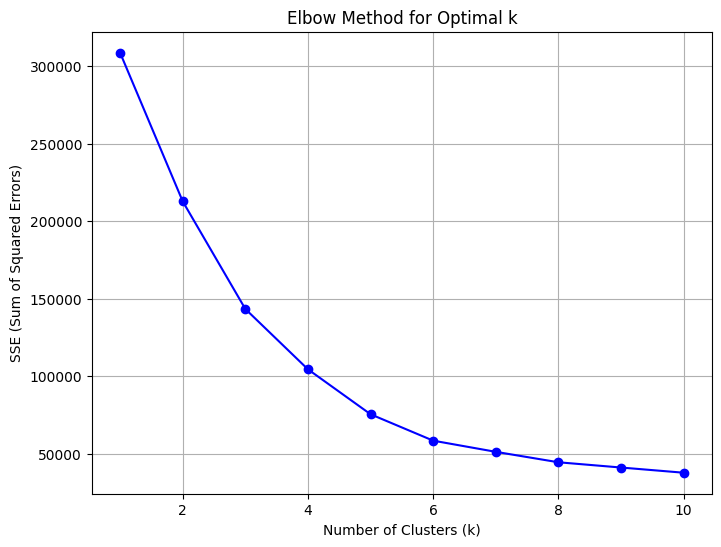

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Kolom yang akan digunakan untuk analisis klasterisasi
X = df[['Age', 'Annual Income', 'Spending Score']]

# Menyimpan nilai SSE (Sum of Squared Errors) untuk setiap jumlah klaster k
sse = []
for k in range(1, 11):  # Melakukan iterasi untuk k dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Menggambar grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

Untuk membuat model K-Means Clustering dengan DataFrame "df" yang memiliki atribut 'Age', 'Annual Income', dan 'Spending Score' dengan jumlah klaster sebanyak 5, dan kemudian menambahkan kolom 'label' ke DataFrame untuk menunjukkan label klaster, Anda dapat mengikuti langkah-langkah berikut:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


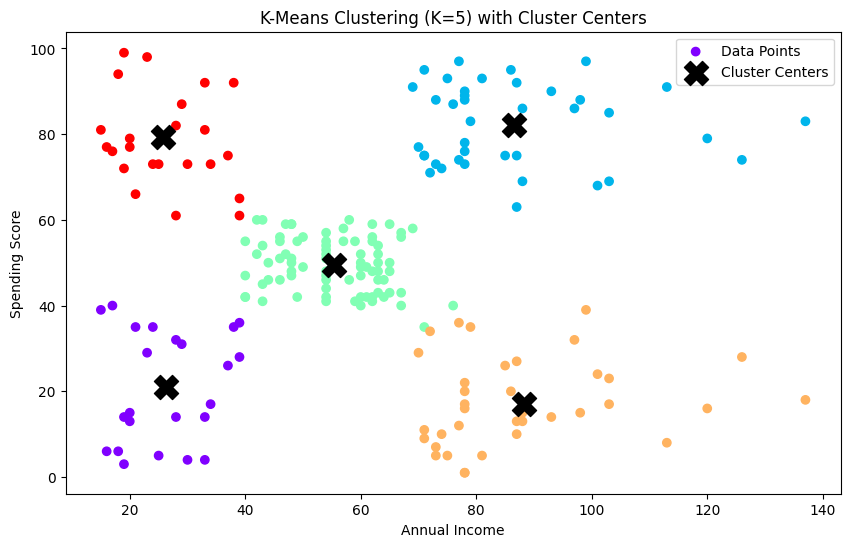

In [ ]:

# Pilih atribut yang akan digunakan untuk klasterisasi
X = df[['Age', 'Annual Income', 'Spending Score']]

# Buat model K-Means dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=0)

# Lakukan klasterisasi pada data
df['label'] = kmeans.fit_predict(X)

# Visualisasikan hasil klasterisasi
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income'], X['Spending Score'], c=df['label'], cmap='rainbow', label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='black', marker='X', label='Cluster Centers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering (K=5) with Cluster Centers')
plt.legend()
plt.show()


Beri kode untuk menghitung nilai sillhouette score untuk k=2 hingga k=10


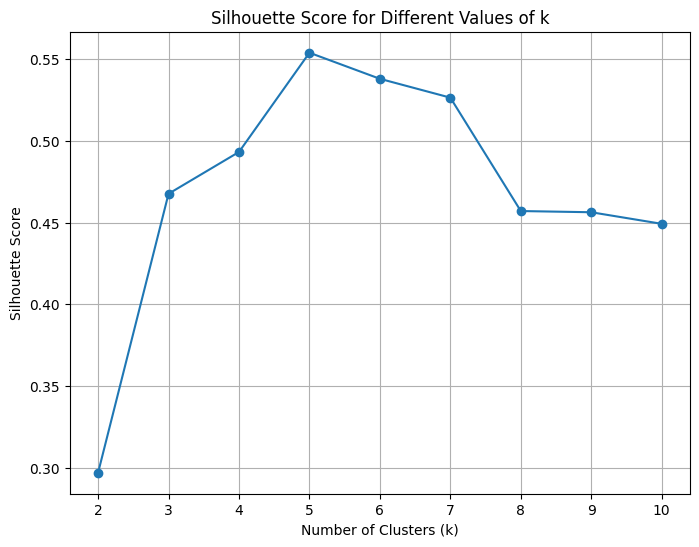

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Pilih atribut yang akan digunakan untuk klasterisasi
X = df[['Annual Income', 'Spending Score']]  # Sesuaikan dengan nama kolom yang benar dalam DataFrame Anda

# Inisialisasi list untuk menyimpan nilai Silhouette Score
silhouette_scores = []

# Loop untuk k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot hasil Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(np.arange(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()




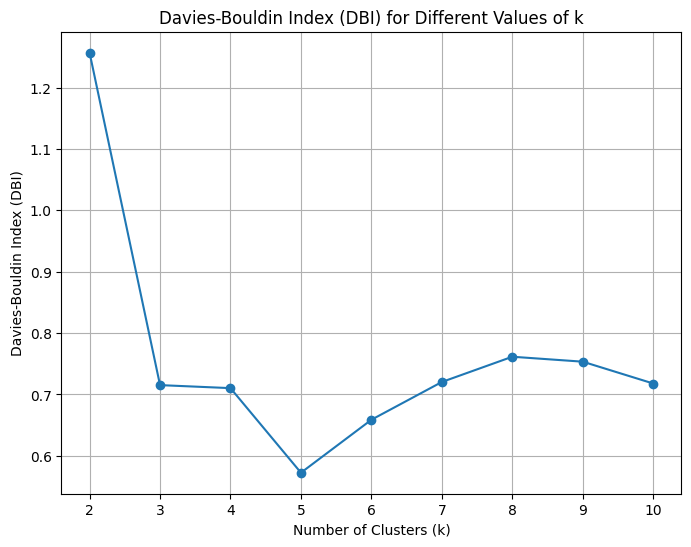

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Pilih atribut yang akan digunakan untuk klasterisasi
X = df[['Annual Income', 'Spending Score']]  # Sesuaikan dengan atribut yang Anda inginkan

# Inisialisasi list untuk menyimpan nilai DBI
dbi_scores = []

# Loop untuk k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X)
    dbi = davies_bouldin_score(X, labels)
    dbi_scores.append(dbi)

# Plot hasil DBI
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), dbi_scores, marker='o')
plt.title('Davies-Bouldin Index (DBI) for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index (DBI)')
plt.grid()
plt.show()


Pada silhoutte score dan dbi, tambahkan scorenya dalam sebuah tabel, jangan hanya gambar saja


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd

# Pilih atribut yang akan digunakan untuk klasterisasi
X = df[['Annual Income', 'Spending Score']]  # Sesuaikan dengan atribut yang Anda inginkan

# Inisialisasi list untuk menyimpan skor Silhouette dan DBI
k_values = list(range(2, 11))
silhouette_scores = []
dbi_scores = []

# Loop untuk k dari 2 hingga 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

    dbi = davies_bouldin_score(X, labels)
    dbi_scores.append(dbi)

# Membuat DataFrame untuk menyimpan skor
scores_df = pd.DataFrame({'k': k_values, 'Silhouette Score': silhouette_scores, 'DBI': dbi_scores})

# Menampilkan DataFrame
print(scores_df)


    k  Silhouette Score       DBI
0   2          0.296897  1.256774
1   3          0.467614  0.715277
2   4          0.493196  0.710364
3   5          0.553932  0.572563
4   6          0.537968  0.658859
5   7          0.526428  0.720375
6   8          0.457044  0.761519
7   9          0.456303  0.753453
8  10          0.449217  0.717904


Beri kode untuk menghitung nilai Calinski-Harabasz Index score untuk k=2 hingga k=10


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import pandas as pd

# Pilih atribut yang akan digunakan untuk klasterisasi
X = df[['Annual Income', 'Spending Score']]  # Sesuaikan dengan atribut yang Anda inginkan

# Inisialisasi list untuk menyimpan nilai CHI
k_values = list(range(2, 11))
chi_scores = []

# Loop untuk k dari 2 hingga 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X)
    chi = calinski_harabasz_score(X, labels)
    chi_scores.append(chi)

# Membuat DataFrame untuk menyimpan skor
scores_df = pd.DataFrame({'k': k_values, 'Calinski-Harabasz Index (CHI)': chi_scores})

# Menampilkan DataFrame
print(scores_df)


    k  Calinski-Harabasz Index (CHI)
0   2                      96.746546
1   3                     151.557009
2   4                     174.064434
3   5                     247.358993
4   6                     242.295678
5   7                     254.829243
6   8                     267.649863
7   9                     271.397133
8  10                     253.745077
